In [1]:
import matplotlib.pyplot as plt
import re
import pandas as pd

original_directory = "../../data/heuristic_public/"
reduced_directory = "../../data/heuristic_public_reduced_split"

import os
reduced_paths = [path for path in os.listdir(reduced_directory) if path.endswith('gr')]

try: 
    reduced_paths = sorted(reduced_paths, key=lambda x: int(x.split('.')[0]))
except ValueError:
    pass

original_data = {'fixed': [], 'free': [], 'edges': []}
reduced_data = {'fixed': [], 'free': [], 'edges': []}
for path in reduced_paths:
    original = open(os.path.join(original_directory, path))
    reduced = open(os.path.join(reduced_directory, path))

    reduced_p_line = reduced.readline()
    reduced_p_line = re.findall("\d+", reduced_p_line)
    if len(reduced_p_line) > 0:
        reduced_data['fixed'].append(int(reduced_p_line[0]))
        reduced_data["free"].append(int(reduced_p_line[1]))
        reduced_data["edges"].append(int(reduced_p_line[2]))
        original_p_line = original.readline()
        original_p_line = re.findall("\d+", original_p_line)
        original_data["fixed"].append(int(original_p_line[0]))
        original_data["free"].append(int(original_p_line[1]))
        original_data["edges"].append(int(original_p_line[2]))
    else:
        reduced_data['fixed'].append(0)
        reduced_data["free"].append(0)
        reduced_data["edges"].append(0)
        original_data["fixed"].append(0)
        original_data["free"].append(0)
        original_data["edges"].append(0)
    original.close()
    reduced.close()
        
original_df = pd.DataFrame(original_data)
reduced_df = pd.DataFrame(reduced_data)

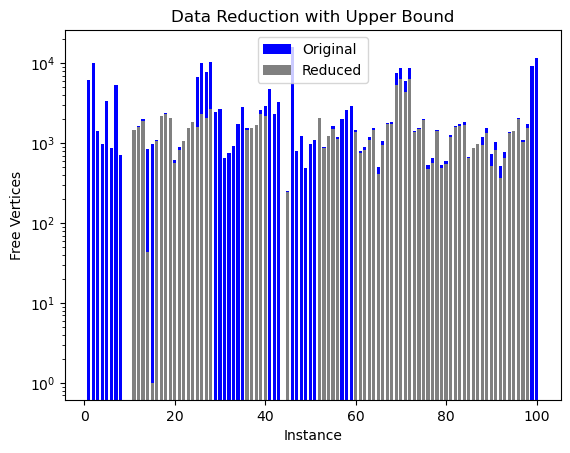

In [4]:
# Get the indices for the data
indices = range(1, len(original_df) +1)

# Plot the data
plt.bar(indices, original_df['free'], width=0.7, label='Original', color='blue')
plt.bar(indices, reduced_df['free'], width=0.7, label='Reduced', color='grey')

# Add labels and title
plt.xlabel('Instance')
plt.ylabel('Free Vertices')
plt.title('Data Reduction with Upper Bound')
#plt.xticks(indices, indices)  # Adjust x-axis ticks
plt.yscale('log')

# Add legend
plt.legend()

# Show plot
plt.show()

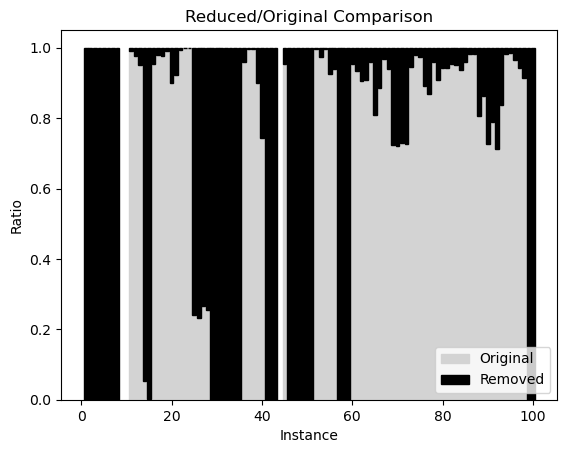

In [3]:
ratio_df = reduced_df / original_df
complement_df = 1 - ratio_df
fig, ax = plt.subplots()

# Plot the bars
bar_width = 0.8
indices = range(1, len(original_df) + 1)
bars1 = ax.bar(indices, ratio_df['free'], width=bar_width, label='Original', color='lightgrey', edgecolor='lightgrey')
bars2 = ax.bar(indices, complement_df['free'], width=bar_width, bottom=ratio_df['free'], label='Removed', color='black', edgecolor='black')

# Add labels and title
plt.xlabel('Instance')
plt.ylabel('Ratio')
plt.title('Reduced/Original Comparison')

plt.legend(loc="lower right")

# Show plot
plt.show()
